In [41]:
#%matplotlib notebook
import sys
sys.path.append('../code')

from mpl_toolkits.mplot3d import Axes3D
from krr import KernelRidgeRegression, krr
from label_data import LabelData
import numpy as np
import matplotlib.pyplot as plt
from mnist_load import load_mnist_data

import time

In [7]:
def k_polynomial(x, xp, d):
    return (np.dot(x, xp)+1)**d


def k_gaussian(x, xp, sigma):
    return np.exp(-np.sum((x-xp)**2)/(2*(sigma**2)))


def k_sigmoid(x, xp, kappa, Theta):
    return np.tanh(kappa * np.dot(x, xp) + Theta)

In [3]:
usage = 0.03
ratio = 0.5
s0, s1 = 1,7
mnist, names = load_mnist_data(s0, s1, ratio, usage)

In [ ]:
print("MNIST Training Dimensions: (%d, %d)\nMNIST Validation Dimensions: (%d, %d)" % (*mnist.training[0].shape, 
                                                                                      *mnist.validation[0].shape))

In [ ]:
def view_digits(ax, digits, nx, ny):
    width = int(np.sqrt(digits.shape[1]))
    img = np.zeros((nx*width, ny*width))
    idx = 0
    for i in range(0, nx):
        for j in range(0, ny):
            img[i*width:i*width+width, j*width:j*width+width] = digits[idx].reshape((width, width))
            idx += 1
    ax.imshow(img, extent=[0, 1, 0, 1], cmap='Greys')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

In [ ]:
fig, ax = plt.subplots()
view_digits(ax, mnist.training[0][0:256], 16, 16)
plt.title("Some Training Data for Digits %d and %d" % (s0, s1))
plt.show()

In [ ]:
ld = LabelData()
print(mnist.training[1].shape, mnist.validation[1].shape)
ld.add_data(mnist.training[0], mnist.training[1])

t0 = time.time()
kregr = KernelRidgeRegression(ld, k=lambda x,y: k_polynomial(x, y, 2), l=.0001)
t1 = time.time()
total = t1-t0
print("Training Time: %2.3f s" % total)


In [ ]:
t0 = time.time()
y_v = np.array([krr(ld, kregr._alpha, lambda x,y: k_polynomial(x, y, 2), x) for x in mnist.validation[0]])
y_v[y_v > 0.5]= 1
y_v[y_v < 0.5]= 0
t1 = time.time()
total = t1-t0
print("Validation Time: %2.3f s" % total)

t0 = time.time()
y_t = np.array([krr(ld, kregr._alpha, lambda x,y: k_polynomial(x, y, 2), x) for x in mnist.training[0]])
y_t[y_t > 0.5]= 1
y_t[y_t < 0.5]= 0
t1 = time.time()
total = t1-t0
print("Risk Time: %2.3f s" % total)
print(y_t)

In [6]:
def risk(y, yp):
    return 1/(np.size(y))*np.sum(0.5*np.abs(y - yp))

In [ ]:
error = risk(mnist.validation[1], y_v)
erisk = risk(mnist.training[1], y_t)

print("Empirical Risk: %2.5f%%" % (erisk*100))
print("Classification Error: %2.5f%%" % (error*100))

In [4]:
def classify_test(s0, s1, usage, ratio, k):
    mnist, names = load_mnist_data(s0, s1, ratio, usage)

    ld = LabelData()
    ld.add_data(mnist.training[0], mnist.training[1])

    t0 = time.time()
    kregr = KernelRidgeRegression(ld, k=k, l=.0001)
    t1 = time.time()
    ttotal = t1 - t0
    #print(mnist.training[1])

    t0 = time.time()
    y_v = np.array([krr(ld, kregr._alpha, k, x) for x in mnist.validation[0]])
    y_v[y_v > 0.5] = 1
    y_v[y_v < 0.5] = 0
    t1 = time.time()
    vtotal = t1 - t0

    t0 = time.time()
    y_t = np.array([krr(ld, kregr._alpha, k, x) for x in mnist.training[0]])
    y_t[y_t > 0.5] = 1
    y_t[y_t < 0.5] = 0
    t1 = time.time()
    rtotal = t1 - t0

    error = risk(mnist.validation[1], y_v)
    erisk = risk(mnist.training[1], y_t)

    return {"error": error, "risk": erisk, "training time": ttotal, "validation time": vtotal, "risk time": rtotal,
            "training size": mnist.training[1].shape[0], "validation size": mnist.validation[1].shape[0]}

In [5]:
cerror = np.zeros((10, 10))
print('& '+ str(list(range(0, 10)))[1:-1].replace(',', '&') + " \\\\ \hline")
for s0 in range(0, 10):
    row_str = str(s0) + ' &'
    for s1 in range(0, 10):
        if s1 < s0:
            res = classify_test(s0, s1, 0.03, 0.5, lambda x, y: k_polynomial(x, y, 2))
            cerror[s0, s1] = res['error']
            row_str += "%2.2f " % (cerror[s0, s1]*100)
        if s1 < 9:
            row_str += ' &'
        else:
            row_str += '\\\\ \hline'
    print(row_str)
        #print(s0, s1, res['error'])

& 0& 1& 2& 3& 4& 5& 6& 7& 8& 9 \\ \hline
0 & & & & & & & & & &\\ \hline


NameError: name 'risk' is not defined

In [12]:
samps = np.logspace(1, 3, 20).astype(np.int)
ress = []
for s in samps:
    usage = 2*s/15000
    print(usage)
    res = classify_test(4, 9, usage, 0.5, lambda x, y: k_polynomial(x, y, 2))
    ress.append(res)

0.0013333333333333333
0.0016
0.0021333333333333334
0.0026666666666666666
0.0034666666666666665
0.0044
0.0056
0.0072
0.0092
0.011733333333333333
0.014933333333333333
0.019066666666666666
0.0244
0.031066666666666666
0.0396
0.05053333333333333
0.0644
0.082
0.10453333333333334
0.13333333333333333


In [13]:
errs = []
risks = []
ttimes = []
vtimes = []
tsize = []

for r in ress:
    errs.append(r['error'])
    risks.append(r['risk'])
    ttimes.append(r['training time'])
    vtimes.append(r['validation time'])
    tsize.append(r['training size'])
    
    

<IPython.core.display.Javascript object>


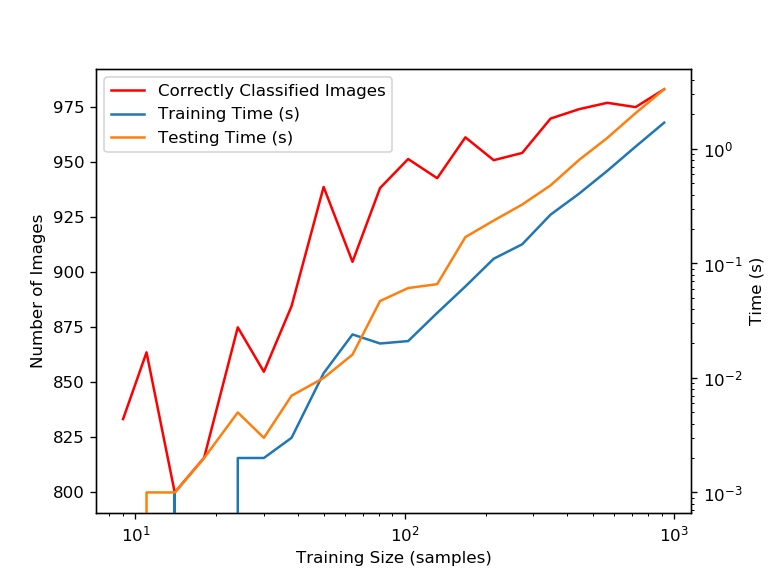

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [51]:
from matplotlib import rc
rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.semilogx(tsize, (1 - np.array(errs))*s, color='r', label='Correctly Classified Images')

ax2 = ax.twinx()
lns2 = ax2.loglog(tsize, ttimes, label='Training Time (s)')
lns3 = ax2.loglog(tsize, vtimes, label='Testing Time (s)')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_xlabel('Training Size (samples)')
ax.set_ylabel('Number of Images')
ax2.set_ylabel('Time (s)')

plt.savefig("mnist.eps", format='eps')
#plt.show()
